In [9]:
%cd ..

/Users/Yura/Projects/Wudpecker AI hackathon


/Users/Yura/Projects/Wudpecker AI hackathon/Wudpecker-hackathon-project/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_processor import DataProcessor
from src.n_grams_scorer import NGramsScorer

In [11]:
data_path = './data/raw/'
dp = DataProcessor(data_path=data_path)
df = dp.get_data

transcripts_df = df.copy()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/Yura/Projects/Wudpecker AI hackathon/Wudpecker-hackathon-project/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/49/k_c7srg902l0fvzkp2mb9kxr0000gn/T/ipykernel_17395/1302657653.py", line 2, in <module>
    dp = DataProcessor(data_path=data_path)
  File "/Users/Yura/Projects/Wudpecker AI hackathon/Wudpecker-hackathon-project/src/data_processor.py", line 12, in __init__
    self.data = self.__get_clean_data()
  File "/Users/Yura/Projects/Wudpecker AI hackathon/Wudpecker-hackathon-project/src/data_processor.py", line 20, in __get_clean_data
    return df
  File "/Users/Yura/Projects/Wudpecker AI hackathon/Wudpecker-hackathon-project/src/data_processor.py", line 26, in __get_good_data
    df['meaningful'] = 1
  File "/Users/Yura/Projects/Wudpecker AI hackathon/Wudpecker-hackathon-project/src/data_processor.py", line 40, in _

In [12]:
transcripts_df.reset_index(inplace=True)

In [13]:

# selecting a portion of good transcripts for training
good_transcripts = transcripts_df[transcripts_df.meaningful == 1.0]['content']
bad_transcripts  = transcripts_df[transcripts_df.meaningful == 0.0]['content']

n_good  = good_transcripts.shape[0]
n_bad   = bad_transcripts.shape[0]

n_training = n_good - n_bad
training_ind = np.random.choice(range(n_good), size=n_training, replace=False)
testing_ind = [i for i in range(n_bad + n_good) if i not in training_ind]
training_data = good_transcripts[training_ind].values
testing_data = transcripts_df.loc[testing_ind, 'content'].values
testing_labels = transcripts_df.loc[testing_ind, 'meaningful'].values

training_data[:5]

array(["okay thankful. something. okay um, we have a list of names was it the one who dragged him out of the wood shed? no he came second. well    Kampei. well it wasn't really Kampei because Kampei is dead, remember. but but Kampei because he died, because of the way that he died he made a great sacrifice for his lord he finally killed himself, you know we had that gut-wrenching, scene, literally. um, uh because of that, Kampei is allowed the the first privilege and so, Kampei's wife's brother, Kampei's brother-in-law Heiemon i- who's a very low ranking samurai offers the first incense. uh in Kampei's name. allowing Kampei to do that even in death then to have this great honor. uh, so they go through this, through through the motions. uh, Wakasono- Wakasanosuke Wakasanosuke shows up at the very end, and he and he comes in and he's in a great fluster and he says Oboshi, at the bottom of page one-seventy-nine them, committing yeah them committing it was assumed? it was assumed, certainl

In [14]:
scorer = NGramsScorer()
scorer.fit(training_data)
testing_scores = [scorer.score(text) for text in testing_data]

In [15]:
testing_scores

[0.07036964517246712,
 0.08955982274616178,
 0.07931575777614437,
 0.06835095311117627,
 0.06104301685020358,
 0.06051023596485815,
 0.06659889424819984,
 0.0586792461581384,
 0.06000431457248089,
 0.0692005746105173,
 0.04396908236104782,
 0.05984915609089393,
 0.06381957747722462,
 0.06026815242475204,
 0.06699891009046312,
 0.0675148998039582,
 0.058285133138509075,
 0.07569474968470102,
 0.08957811244651026,
 0.07704908590105818,
 0.06427866421141723,
 0.06922917617261234,
 0.06975383145932038,
 0.06139158074708283,
 0.06137601382035289,
 0.06938323978707697,
 0.04770597477143798,
 0.02062175766487651,
 0.039232068821217644,
 0.04529787136136772,
 0.06926642806758364,
 0.05763065991457689,
 0.05977306369748914,
 0.05763965681897953,
 0.11804308797127469,
 0.012438983069863819,
 0.05338448462455468,
 0.0430897750849194,
 0.04366556121788596,
 0.04268211003669276,
 0.003808645918321534,
 0.010621611270984816,
 0.0740339716647287,
 0.06316313474893472,
 0.04154659912617693,
 0.0164394

/var/folders/49/k_c7srg902l0fvzkp2mb9kxr0000gn/T/ipykernel_17395/1335359945.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(labels=['Corrupted', 'Clean'])


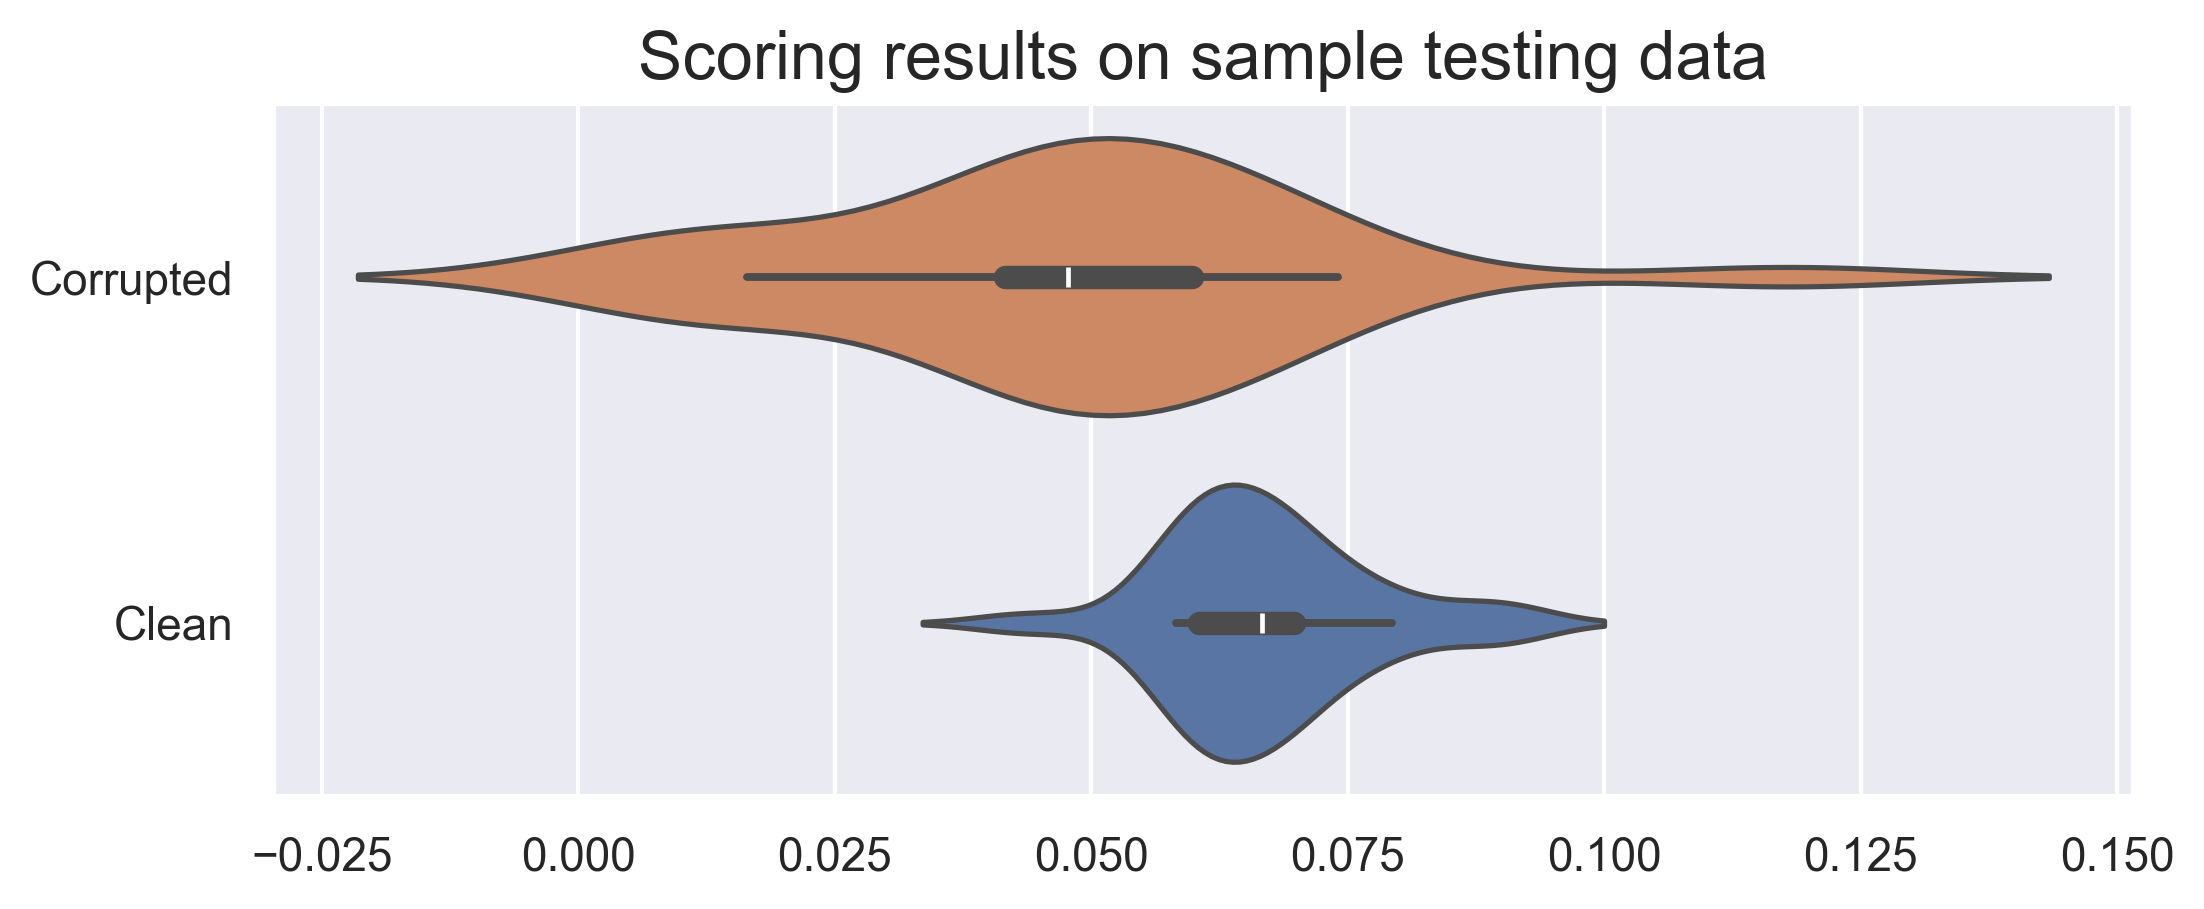

In [41]:
plt.figure(figsize=(8,3), dpi=300)
sns.violinplot(y=testing_labels, x=testing_scores, orient='h', hue= 1 - testing_labels, legend=False)
plt.gca().set_yticklabels(labels=['Corrupted', 'Clean'])
sns.set(style='darkgrid')
plt.title("Scoring results on sample testing data", fontsize=16)
plt.show()